In [11]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, SGDClassifier, Lasso,RidgeCV
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, learning_curve, KFold
from sklearn.dummy import DummyRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, median_absolute_error, mean_absolute_percentage_error, RocCurveDisplay, mean_squared_log_error,  accuracy_score,precision_score,recall_score,f1_score
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler, RobustScaler, StandardScaler, FunctionTransformer, LabelEncoder, OneHotEncoder, Binarizer, OrdinalEncoder, MaxAbsScaler
from sklearn.compose import make_column_transformer
from sklearn.decomposition import PCA 
from sklearn.impute import SimpleImputer  
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectFromModel, RFE, RFECV 
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor, ExtraTreesRegressor, VotingClassifier, VotingRegressor,StackingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
# from pycaret.regression import *
import xgboost
from os import stat
import numpy as np
import pandas as pd 
from contextlib import closing
from urllib.request import urlopen
import json
from datetime import datetime 
import lightgbm


import warnings
warnings.filterwarnings('ignore')


In [12]:
def transform_weather(x):
    if x == 1:
        x = 4
    elif x == 2:
        x = 3
    elif x == 3:
        x = 2 
    elif x == 4:
        x = 1
        
    return x 

In [13]:
def transform_season(x):
    if x == 1:
        x = 3
    elif x == 2:
        x = 4
    elif x == 3:
        x = 2 
    elif x == 4:
        x = 1
        
    return x 

# Les transformations : 

Transformation des variables weather & season
(1 à 4) => 1 les mauvais jours et 4 les meilleurs


Ajout de data avec 0 count aux températures extrême pour donner une info type catastrophe naturelle. 

Pour insister sur le fait que le pic de fréquentation est aux alentours des 30 degrès et n'augmentera pas s'il fait "trop" chaud


Transformation colonne datetime en dayofyear, hour et year. 


In [14]:
# Les transformations 
train_data_all =  pd.read_csv('../data/train.csv')
train_data_all

,Unnamed: 0,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9058,9058,2012-08-19 19:00:00,3,0,0,2,26.24,30.305,73,8.9981,72,269,341
9059,9059,2012-08-19 20:00:00,3,0,0,2,26.24,30.305,73,12.9980,61,213,274
9060,9060,2012-08-19 21:00:00,3,0,0,3,25.42,29.545,78,6.0032,36,154,190
9061,9061,2012-08-19 22:00:00,3,0,0,2,25.42,29.545,78,11.0014,6,50,56


In [15]:
# Les transformations 
train_data_all =  pd.read_csv('../data/train.csv')
train_data_all.drop('Unnamed: 0', axis=1, inplace=True)

train_data_all = train_data_all.append({'datetime' : '2011-08-17 08:00:00', 'season' : 0, 'holiday' : 0, 'workingday' : 0, 'weather' : 4, 'temp' : 75, 'atemp' : 72, 'humidity' : 2, 'windspeed' : 500, 'casual' : 0, 'registered' : 0, 'count' : 0}, ignore_index = True)
train_data_all = train_data_all.append({'datetime' : '2012-07-15 09:00:00', 'season' : 0, 'holiday' : 0, 'workingday' : 0, 'weather' : 1, 'temp' : 96, 'atemp' : 88, 'humidity' : 2, 'windspeed' : 500.0, 'casual' : 0, 'registered' : 0, 'count' : 0}, ignore_index = True)
train_data_all = train_data_all.append({'datetime' : '2011-08-10 11:00:00', 'season' : 1, 'holiday' : 0, 'workingday' : 0, 'weather' : 4, 'temp' : 200, 'atemp' : 155, 'humidity' : 51, 'windspeed' : 0, 'casual' : 0, 'registered' : 0, 'count' : 0}, ignore_index = True)
train_data_all = train_data_all.append({'datetime' : '2011-08-12 19:00:00', 'season' : 2, 'holiday' : 0, 'workingday' : 0, 'weather' : 3, 'temp' : 111, 'atemp' : 110, 'humidity' : 4, 'windspeed' : 225, 'casual' : 0, 'registered' : 0, 'count' : 0}, ignore_index = True)
train_data_all = train_data_all.append({'datetime' : '2011-12-08 18:00:00', 'season' : 4, 'holiday' : 0, 'workingday' : 0, 'weather' : 4, 'temp' : -48, 'atemp' : -55, 'humidity' : 9, 'windspeed' : 110, 'casual' : 0, 'registered' : 0,  'count' : 0}, ignore_index = True)
train_data_all = train_data_all.append({'datetime' : '2011-12-24 17:00:00', 'season' : 4, 'holiday' : 0, 'workingday' : 0, 'weather' : 4, 'temp' : -110, 'atemp' : -108, 'humidity' : 25, 'windspeed' : 110, 'casual' : 0, 'registered' : 0,  'count' : 0}, ignore_index = True)
train_data_all = train_data_all.append({'datetime' : '2011-11-25 16:00:00', 'season' : 4, 'holiday' : 0, 'workingday' : 0, 'weather' : 4, 'temp' : -48, 'atemp' : -55, 'humidity' : 69, 'windspeed' : 110, 'casual' : 0, 'registered' : 0,  'count' : 0}, ignore_index = True)
train_data_all = train_data_all.append({'datetime' : '2011-12-27 15:00:00', 'season' : 4, 'holiday' : 0, 'workingday' : 0, 'weather' : 1, 'temp' : -500, 'atemp' : -55, 'humidity' : 0, 'windspeed' : 110, 'casual' : 0, 'registered' : 0,  'count' : 0}, ignore_index = True)
train_data_all = train_data_all.append({'datetime' : '2011-07-21 15:00:00', 'season' : 0, 'holiday' : 0, 'workingday' : 0, 'weather' : 2, 'temp' : 75, 'atemp' : 72.5, 'humidity' : 41, 'windspeed' : 500, 'casual' : 0, 'registered' : 0, 'count' : 0}, ignore_index = True)
train_data_all = train_data_all.append({'datetime' : '2011-06-04 13:00:00', 'season' : 1, 'holiday' : 0, 'workingday' : 0, 'weather' : 4, 'temp' : 200, 'atemp' : 155, 'humidity' : 55, 'windspeed' : 0, 'casual' : 0, 'registered' : 0, 'count' : 0}, ignore_index = True)
train_data_all = train_data_all.append({'datetime' : '2011-06-05 14:00:00', 'season' : 2, 'holiday' : 0, 'workingday' : 0, 'weather' : 3, 'temp' : 111, 'atemp' : 110, 'humidity' : 25, 'windspeed' : 225, 'casual' : 0, 'registered' : 0, 'count' : 0}, ignore_index = True)
train_data_all = train_data_all.append({'datetime' : '2011-11-28 15:00:00', 'season' : 4, 'holiday' : 0, 'workingday' : 0, 'weather' : 4, 'temp' : -48, 'atemp' : -55, 'humidity' : 39, 'windspeed' : 110, 'casual' : 0, 'registered' : 0, 'count' : 0}, ignore_index = True)
train_data_all = train_data_all.append({'datetime' : '2011-12-27 09:00:00', 'season' : 4, 'holiday' : 0, 'workingday' : 0, 'weather' : 3, 'temp' : -110, 'atemp' : -108, 'humidity' : 10, 'windspeed' : 110, 'casual' : 0, 'registered' : 0, 'count' : 0}, ignore_index = True)
train_data_all = train_data_all.append({'datetime' : '2011-11-27 12:00:00', 'season' : 4, 'holiday' : 0, 'workingday' : 0, 'weather' : 4, 'temp' : -48, 'atemp' : -55, 'humidity' : 57, 'windspeed' : 110, 'casual' : 0, 'registered' : 0, 'count' : 0}, ignore_index = True)
train_data_all = train_data_all.append({'datetime' : '2012-01-02 16:00:00', 'season' : 4, 'holiday' : 0, 'workingday' : 0, 'weather' : 4, 'temp' : -500, 'atemp' : -55, 'humidity' : 84, 'windspeed' : 110, 'casual' : 0, 'registered' : 0, 'count' : 0}, ignore_index = True)

train_data_all['day'] = pd.to_datetime(train_data_all['datetime']).dt.dayofyear
train_data_all['hour'] = pd.to_datetime(train_data_all['datetime']).dt.hour
train_data_all['year'] = pd.to_datetime(train_data_all['datetime']).dt.year

train_data_all.drop(['datetime'], axis=1, inplace=True)


for i in range(0, len(train_data_all.iloc[:,0])) :
    train_data_all.iloc[i,0] = transform_season(int(train_data_all.iloc[i,0] ))
    
for i in range(0, len(train_data_all.iloc[:,3])) :
    train_data_all.iloc[i,3] = transform_weather(int(train_data_all.iloc[i,3] ))


train_data_all = train_data_all.drop(['registered','casual'], axis=1)



augmentation = np.linspace(0, (144 * 100 / 230) *  train_data_all.shape[0] , train_data_all.shape[0])

# train_data_all['augmentation'] = 0 
# train_data_all['augmentation'] = augmentation # Etape suivante : Il faut order par day avant de drop datetime pour que ce soit cohérent 




train_data_all_X = train_data_all.drop('count', axis = 1)
train_data_all_y = train_data_all['count']




test_data_all =  pd.read_csv('../data/test.csv')
test_data_all.drop('Unnamed: 0', axis=1, inplace=True)
test_data_all['day'] = pd.to_datetime(test_data_all['datetime']).dt.dayofyear
test_data_all['hour'] = pd.to_datetime(test_data_all['datetime']).dt.hour
test_data_all['year'] = pd.to_datetime(test_data_all['datetime']).dt.year
test_data_all.drop(['datetime'], axis=1, inplace=True)

for i in range(0, len(test_data_all.iloc[:,0])) :
    test_data_all.iloc[i,0] = transform_season(int(test_data_all.iloc[i,0] ))
    
for i in range(0, len(test_data_all.iloc[:,3])) :
    test_data_all.iloc[i,3] = transform_weather(int(test_data_all.iloc[i,3] ))

# augmentation = np.linspace(0, (144 * 100 / 230) *  test_data_all.shape[0] / 100 , test_data_all.shape[0])
# test_data_all['augmentation'] = augmentation


test_data_all = test_data_all.drop(['registered','casual'], axis=1)

test_data_all_X = test_data_all.drop('count', axis = 1)
test_data_all_y = test_data_all['count']


On utilise deux pipelines, l'une pour traité les valeurs numériques et l'autres pour les valeurs catégoriques. 

<AxesSubplot:>

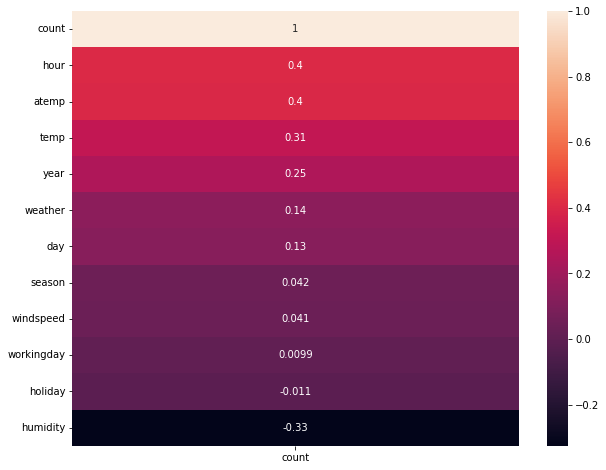

In [10]:
plt.figure(figsize=(10,8))
sns.heatmap(train_data_all.corr()[['count']].sort_values('count',ascending=False), annot=True)

In [ ]:
# Meilleur model : 
# Preprocessing et model xgboost :0.9056841627368329(8s)

logfunc = FunctionTransformer(func=np.log1p, inverse_func=np.exp, check_inverse=False)

numerical_features = ['temp','atemp','humidity','windspeed','day','hour']
encode_column = ['season','workingday','weather','holiday','hour','year']

numerical_pipeline = make_pipeline( SimpleImputer(), MaxAbsScaler())
encode_pipeline = make_pipeline(StandardScaler(with_mean=False, with_std=True), OneHotEncoder(handle_unknown = 'ignore'))

preprocessor = make_column_transformer((numerical_pipeline, numerical_features),(encode_pipeline , encode_column))

xgb = xgboost.XGBRegressor(booster='gbtree', colsample_bytree = 0.493659, eta = 0.28, gamma=0,max_depth = 7, max_leaves=0, n_estimators =100, objective='reg:squarederror', random_state=32, 
                            reg_alpha=1.6666666666666667, reg_lambda =1.9791666666666667, subsample_freq=0.75, tree_method='auto')

model_xgboost = make_pipeline(preprocessor,  xgb)
model_xgboost.fit(train_data_all_X , train_data_all_y)
print('train data', model_xgboost.score(train_data_all_X, train_data_all_y))
print('test data', model_xgboost.score(test_data_all_X, test_data_all_y))

[10:01:25] WARNING: ../src/learner.cc:576: 
Parameters: { "subsample_freq" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


train data 0.986720359083927
test data 0.8967965326020695


In [67]:
# Preprocessing et model lgbm : 0.9190960274167893 (8s)

logfunc = FunctionTransformer(func=np.log1p, inverse_func=np.exp, check_inverse=False)

numerical_features = ['temp','atemp','humidity','windspeed','day','hour']
encode_column = ['season','workingday','weather','holiday','hour','year']

numerical_pipeline = make_pipeline( logfunc, SimpleImputer(missing_values=np.nan), MaxAbsScaler())
encode_pipeline = make_pipeline(StandardScaler(with_mean=False, with_std=True), OneHotEncoder(handle_unknown = 'ignore'))

preprocessor = make_column_transformer((numerical_pipeline, numerical_features),(encode_pipeline , encode_column))


model_lgbm =  lightgbm.LGBMRegressor(random_state=2, colsample_bytree=0.7395, learning_rate=0.12, max_bin=1023, max_depth=8, reg_lambda=1,reg_alpha=0, subsample_freq=7)
model_lgbm_fit = make_pipeline(preprocessor, model_lgbm)
model_lgbm_fit.fit(train_data_all_X , train_data_all_y)
print('train', model_lgbm_fit.score(train_data_all_X, train_data_all_y))
print('test', model_lgbm_fit.score(test_data_all_X, test_data_all_y))

train 0.9614442590972704
test 0.9190960274167893


In [69]:
# Preprocessing et model lgbm : 0.9190960274167893 (8s)

logfunc = FunctionTransformer(func=np.log1p, inverse_func=np.exp, check_inverse=False)

numerical_features = ['temp','atemp','humidity','windspeed','day','hour']
encode_column = ['season','workingday','weather','holiday','hour','year']

numerical_pipeline = make_pipeline(  SimpleImputer(), MaxAbsScaler())
encode_pipeline = make_pipeline(StandardScaler(with_mean=False, with_std=True), OneHotEncoder(handle_unknown = 'ignore'))

preprocessor = make_column_transformer((numerical_pipeline, numerical_features),(encode_pipeline , encode_column))


model_lgbm_2 =  lightgbm.LGBMRegressor(random_state=2, colsample_bytree=0.7385, learning_rate=0.07, max_bin=725, max_depth=8, reg_lambda=0.68596,reg_alpha=0, subsample_freq=56)
model_lgbm_fit = make_pipeline(preprocessor, model_lgbm_2)
model_lgbm_fit.fit(train_data_all_X , train_data_all_y)
print('train', model_lgbm_fit.score(train_data_all_X, train_data_all_y))
print('test', model_lgbm_fit.score(test_data_all_X, test_data_all_y))

train 0.9521333672398784
test 0.9051328597939277


In [19]:
# Meilleur model n2 lgbm : 
# Preprocessing et model lgbm :0.9118832634446215 (8s)

logfunc = FunctionTransformer(func=np.log1p, inverse_func=np.exp, check_inverse=False)

numerical_features = ['temp','atemp','humidity','windspeed','day','hour']
encode_column = ['season','workingday','weather','holiday','hour','year']

numerical_pipeline = make_pipeline( logfunc, SimpleImputer(), MaxAbsScaler())
encode_pipeline = make_pipeline(StandardScaler(with_mean=False, with_std=True), OneHotEncoder(handle_unknown = 'ignore'))

preprocessor = make_column_transformer((numerical_pipeline, numerical_features),(encode_pipeline , encode_column))


model_lgbm_3 = lightgbm.LGBMRegressor(random_state=2, min_data_in_leaf=100, max_bin=1023, reg_alpha=0, subsample_freq=56)
model_lgbm_fit = make_pipeline(preprocessor,  model_lgbm_3)
model_lgbm_fit.fit(train_data_all_X , train_data_all_y)
print('train', model_lgbm_fit.score(train_data_all_X, train_data_all_y))
print('test', model_lgbm_fit.score(test_data_all_X, test_data_all_y))

[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
train 0.9522756520038445
test 0.9118832634446215


In [20]:
# colsample_bytree => Pourcentage de features utilisé pour chaque arbre réduit a 46% et resultat pas loin de 73% + modif learning rate 
# Preprocessing et model lgbm : 0.9064545094483808(8s)

logfunc = FunctionTransformer(func=np.log1p, inverse_func=np.exp, check_inverse=False)

numerical_features = ['temp','atemp','humidity','windspeed','day','hour']
encode_column = ['season','workingday','weather','holiday','hour','year']

numerical_pipeline = make_pipeline( logfunc, SimpleImputer(), MaxAbsScaler())
encode_pipeline = make_pipeline(StandardScaler(with_mean=False, with_std=True), OneHotEncoder())

preprocessor = make_column_transformer((numerical_pipeline, numerical_features),(encode_pipeline , encode_column))


model_lgbm_4 =  lightgbm.LGBMRegressor(random_state=2, colsample_bytree=0.469, learning_rate=0.1239599, max_bin=1023, max_depth=8, reg_lambda=1,reg_alpha=0, subsample_freq=7)
model_lgbm_fit = make_pipeline(preprocessor, model_lgbm_4)
model_lgbm_fit.fit(train_data_all_X , train_data_all_y)
print('train', model_lgbm_fit.score(train_data_all_X, train_data_all_y))
print('test', model_lgbm_fit.score(test_data_all_X, test_data_all_y))

train 0.9588957920387866
test 0.9074659738499581


Modele => Voting Regressor 

In [21]:
# Preprocessing et model Votingmodel : 0.917337454042215 (2s4)

logfunc = FunctionTransformer(func=np.log1p, inverse_func=np.exp, check_inverse=False)

numerical_features = ['temp','atemp','humidity','windspeed','day','hour']
encode_column = ['season','workingday','weather','holiday','hour','year']

numerical_pipeline = make_pipeline( logfunc, SimpleImputer(), MaxAbsScaler())
encode_pipeline = make_pipeline(StandardScaler(), OneHotEncoder())

preprocessor = make_column_transformer((numerical_pipeline, numerical_features),(encode_pipeline , encode_column))

VC = VotingRegressor([('xgboos' , xgb),('lgbm' , model_lgbm), ('lgbm2' , model_lgbm_2),('lgbm3' , model_lgbm_3), ('lgbm4' , model_lgbm_4)])

model_voting = make_pipeline(preprocessor, VC)

model_voting.fit(train_data_all_X, train_data_all_y)
model_voting.score(test_data_all_X, test_data_all_y)

[22:11:18] WARNING: ../src/learner.cc:576: 
Parameters: { "subsample_freq" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




0.9140491767414458

Model de stacking => 

In [23]:
# Preprocessing et model Votingmodel : 0.9288990012377096 (6s)

logfunc = FunctionTransformer(func=np.log1p, inverse_func=np.exp, check_inverse=False)

numerical_features = ['temp','atemp','humidity','windspeed','day','hour']
encode_column = ['season','workingday','weather','holiday','hour','year']

numerical_pipeline = make_pipeline( logfunc, SimpleImputer(), MaxAbsScaler())
encode_pipeline = make_pipeline(StandardScaler(with_mean=False, with_std=True), OneHotEncoder(handle_unknown = 'ignore'))

preprocessor = make_column_transformer((numerical_pipeline, numerical_features),(encode_pipeline , encode_column))

stack_model = StackingRegressor([('xgboos' , xgb),('lgbm' , model_lgbm), ('lgbm2' , model_lgbm_3)])

model_stack = make_pipeline(preprocessor, stack_model)

model_stack.fit(train_data_all_X, train_data_all_y)
model_stack.score(test_data_all_X, test_data_all_y)
y_pred = model_stack.predict(test_data_all_X)
print('mean abs error' , mean_absolute_error(test_data_all_y, y_pred))

[22:12:48] WARNING: ../src/learner.cc:576: 
Parameters: { "subsample_freq" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:12:49] WARNING: ../src/learner.cc:576: 
Parameters: { "subsample_freq" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:12:50] WARNING: ../src/learner.cc:576: 
Parameters: { "subsample_freq" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually bei

In [12]:
# Preprocessing et model Votingmodel : 0.9288990012377096 (6s)

logfunc = FunctionTransformer(func=np.log1p, inverse_func=np.exp, check_inverse=False)

numerical_features = ['temp','atemp','humidity','windspeed','day','hour']
encode_column = ['season','workingday','weather','holiday','hour','year']

numerical_pipeline = make_pipeline( logfunc, SimpleImputer(), MaxAbsScaler())
encode_pipeline = make_pipeline(StandardScaler(with_mean=False, with_std=True), OneHotEncoder(handle_unknown = 'ignore'))

preprocessor = make_column_transformer((numerical_pipeline, numerical_features),(encode_pipeline , encode_column))

stack_model = StackingRegressor([('xgboos' , xgb),('lgbm' , model_lgbm), ('lgbm2' , model_lgbm_2),('lgbm3' , model_lgbm_3),('lgbm4' , model_lgbm_4)])

model_stack = make_pipeline(preprocessor, stack_model)

model_stack.fit(train_data_all_X, train_data_all_y)
model_stack.score(test_data_all_X, test_data_all_y)

[19:59:42] WARNING: ../src/learner.cc:576: 
Parameters: { "subsample_freq" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:59:44] WARNING: ../src/learner.cc:576: 
Parameters: { "subsample_freq" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:59:45] WARNING: ../src/learner.cc:576: 
Parameters: { "subsample_freq" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually bei

0.9244984606061998

In [13]:
# Preprocessing et model Votingmodel : 0.9288990012377096 (6s)

logfunc = FunctionTransformer(func=np.log1p, inverse_func=np.exp, check_inverse=False)

numerical_features = ['temp','atemp','humidity','windspeed','day','hour']
encode_column = ['season','workingday','weather','holiday','hour','year']

numerical_pipeline = make_pipeline( logfunc, SimpleImputer(), MaxAbsScaler())
encode_pipeline = make_pipeline(StandardScaler(with_mean=False, with_std=True), OneHotEncoder(handle_unknown = 'ignore'))

preprocessor = make_column_transformer((numerical_pipeline, numerical_features),(encode_pipeline , encode_column))

stack_model = StackingRegressor([('xgboos' , xgb),('lgbm' , model_lgbm), ('lgbm2' , model_lgbm_2),('lgbm3' , model_lgbm_3),('lgbm4' , model_lgbm_4)])

model_stack = make_pipeline(preprocessor, stack_model)

model_stack.fit(train_data_all_X, train_data_all_y)
model_stack.score(test_data_all_X, test_data_all_y)

[19:59:54] WARNING: ../src/learner.cc:576: 
Parameters: { "subsample_freq" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:59:56] WARNING: ../src/learner.cc:576: 
Parameters: { "subsample_freq" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:59:57] WARNING: ../src/learner.cc:576: 
Parameters: { "subsample_freq" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually bei

0.9244984606061998

# Les modèles avec une fonction logarythme donner de bons score mais elle pose un problème de prédictions avec les valeurs négatives. 

# On a donc décidé de retiré la fonction logarythme et d'optimiser les paramètres pour rehausser le score 

In [19]:
# Meilleur model : 
# Preprocessing et model xgboost :0.9056841627368329(8s)

numerical_features = ['temp','atemp','humidity','windspeed','day','hour']
encode_column = ['season','workingday','weather','holiday','hour','year']

numerical_pipeline = make_pipeline( SimpleImputer(), MaxAbsScaler())
encode_pipeline = make_pipeline(StandardScaler(with_mean=False, with_std=True), OneHotEncoder(handle_unknown = 'ignore'))

preprocessor = make_column_transformer((numerical_pipeline, numerical_features),(encode_pipeline , encode_column))

xgb = xgboost.XGBRegressor(booster='gbtree', colsample_bytree = 0.493659, eta = 0.28, gamma=0,max_depth = 7, max_leaves=0, n_estimators =100, objective='reg:squarederror', random_state=32, 
                            reg_alpha=1.6666666666666667, reg_lambda =1.9791666666666667, subsample_freq=0.75, tree_method='auto')

model_xgboost = make_pipeline(preprocessor,  xgb)
model_xgboost.fit(train_data_all_X , train_data_all_y)
print('train data', model_xgboost.score(train_data_all_X, train_data_all_y))
print('test data', model_xgboost.score(test_data_all_X, test_data_all_y))

[10:01:25] WARNING: ../src/learner.cc:576: 
Parameters: { "subsample_freq" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


train data 0.986720359083927
test data 0.8967965326020695


In [13]:
# Preprocessing et model lgbm : 0.9190960274167893 (8s)

numerical_features = ['temp','atemp','humidity','windspeed','day','hour']
encode_column = ['season','workingday','weather','holiday','hour','year']

numerical_pipeline = make_pipeline(  SimpleImputer(), MaxAbsScaler())
encode_pipeline = make_pipeline(StandardScaler(with_mean=False, with_std=True), OneHotEncoder(handle_unknown = 'ignore'))

preprocessor = make_column_transformer((numerical_pipeline, numerical_features),(encode_pipeline , encode_column))

model_lgbm_2 =  lightgbm.LGBMRegressor(random_state=2, colsample_bytree=0.7385, learning_rate=0.07, max_bin=725, max_depth=8, reg_lambda=0.68596,reg_alpha=0, subsample_freq=56)
model_lgbm_fit = make_pipeline(preprocessor, model_lgbm_2)
model_lgbm_fit.fit(train_data_all_X , train_data_all_y)
print('train', model_lgbm_fit.score(train_data_all_X, train_data_all_y))
print('test', model_lgbm_fit.score(test_data_all_X, test_data_all_y))

train 0.9521333672398784
test 0.9051328597939277


In [14]:
# All models 

xgb = xgboost.XGBRegressor(booster='gbtree', colsample_bytree = 0.493659, eta = 0.28, gamma=0,max_depth = 7, max_leaves=0, n_estimators =100, objective='reg:squarederror', random_state=32, 
                            reg_alpha=1.6666666666666667, reg_lambda =1.9791666666666667, subsample_freq=0.75, tree_method='auto')

model_lgbm =  lightgbm.LGBMRegressor(random_state=2, colsample_bytree=0.7395, learning_rate=0.12, max_bin=1023, max_depth=8, reg_lambda=1,reg_alpha=0, subsample_freq=7)

model_lgbm_2 =  lightgbm.LGBMRegressor(random_state=2, colsample_bytree=0.7385, learning_rate=0.07, max_bin=725, max_depth=8, reg_lambda=0.68596,reg_alpha=0, subsample_freq=56)

model_lgbm_3 = lightgbm.LGBMRegressor(random_state=2, min_data_in_leaf=100, max_bin=1023, reg_alpha=0, subsample_freq=56)

model_lgbm_4 =  lightgbm.LGBMRegressor(random_state=2, colsample_bytree=0.469, learning_rate=0.1239599, max_bin=1023, max_depth=8, reg_lambda=1,reg_alpha=0, subsample_freq=7)

VC = VotingRegressor([('xgboos' , xgb),('lgbm' , model_lgbm), ('lgbm2' , model_lgbm_2),('lgbm3' , model_lgbm_3), ('lgbm4' , model_lgbm_4)])

stack_model = StackingRegressor([('xgboos' , xgb),('lgbm' , model_lgbm), ('lgbm2' , model_lgbm_2),('lgbm3' , model_lgbm_3),('lgbm4' , model_lgbm_4)])



# Test d'optimisation avec Optuna 

In [38]:
import optuna 
def objective(trial):
    import xgboost as xgb 
    dtrain = xgb.DMatrix(train_data_all_X, label=train_data_all_y)
    dtest = xgb.DMatrix(test_data_all_X, label=test_data_all_y)

    param = {
        "booster": trial.suggest_categorical("booster", ["gbtree", "gblinear", "dart"]),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.0, 1.0),
        "eta": trial.suggest_float("eta", 1e-8, 1.0),
        "gamma": trial.suggest_float("gamma", 1e-8, 1.0),
        "max_depth": trial.suggest_int("max_depth", 1, 9),
        "max_leaves": trial.suggest_int("max_leaves", 0, 50),
        "objective": "reg:squarederror",
        "reg_alpha": trial.suggest_loguniform("alpha", 1e-8, 2.0),
        "reg_lambda": trial.suggest_loguniform("lambda", 1e-8, 2.0),
        "eval_metric": "mae",
        "random_state" : 2
    }

    # Add a callback for pruning.
    pruning_callback = optuna.integration.XGBoostPruningCallback(trial, "validation-mae")
    best_model = xgb.train(param, dtrain, evals=[(dtest, "validation")], callbacks=[pruning_callback])
    preds = best_model.predict(dtest)
    pred_labels = np.rint(preds)
    accuracy = mean_absolute_error(test_data_all_y, pred_labels)
    # accuracy = { 'r2_score' : round(r2_score(test_data_all_y, pred_labels), 4), 'mse' :  round(mean_squared_error(test_data_all_y, pred_labels ),4), 'median abs err' :  round(median_absolute_error(test_data_all_y, pred_labels),4), 'mean abs err' :  round(mean_absolute_error(test_data_all_y, pred_labels),4)}
    return accuracy



In [39]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)
print(study.best_trial)

[I 2022-04-08 10:11:08,572] A new study created in memory with name: no-name-315528cd-905d-445d-a67e-446c70270384


[0]	validation-mae:182.12363
[1]	validation-mae:172.77174
[2]	validation-mae:165.73238
[3]	validation-mae:156.70548
[4]	validation-mae:154.19252
[5]	validation-mae:153.07251
[6]	validation-mae:152.89870
[7]	validation-mae:152.94453
[8]	validation-mae:151.28181
[9]	validation-mae:151.28134


[I 2022-04-08 10:11:08,801] Trial 0 finished with value: 151.2803071859572 and parameters: {'booster': 'dart', 'colsample_bytree': 0.06926902275121016, 'eta': 0.883165156722046, 'gamma': 0.724122320905529, 'max_depth': 6, 'max_leaves': 46, 'alpha': 7.336828175554749e-07, 'lambda': 0.001455838076469405}. Best is trial 0 with value: 151.2803071859572.


[0]	validation-mae:75.95242
[1]	validation-mae:65.41508
[2]	validation-mae:60.65850
[3]	validation-mae:60.71726
[4]	validation-mae:60.25446
[5]	validation-mae:60.43544
[6]	validation-mae:61.96095
[7]	validation-mae:62.50245
[8]	validation-mae:62.63272
[9]	validation-mae:65.38998


[I 2022-04-08 10:11:09,055] Trial 1 finished with value: 65.38507953922107 and parameters: {'booster': 'gbtree', 'colsample_bytree': 0.9089659669004314, 'eta': 0.9749967096614847, 'gamma': 0.9193238816097603, 'max_depth': 7, 'max_leaves': 35, 'alpha': 1.0064876485480154e-06, 'lambda': 0.0014320554373507778}. Best is trial 0 with value: 151.2803071859572.


[10:11:09] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "max_leaves" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation-mae:178.35680
[1]	validation-mae:164.03906
[2]	validation-mae:159.43570
[3]	validation-mae:155.48962
[4]	validation-mae:151.48408
[5]	validation-mae:147.70956
[6]	validation-mae:144.45575
[7]	validation-mae:141.84444
[8]	validation-mae:139.86281
[9]	validation-mae:138.48119


[I 2022-04-08 10:11:09,224] Trial 2 finished with value: 138.4766867800329 and parameters: {'booster': 'gblinear', 'colsample_bytree': 0.3922940199255336, 'eta': 0.9098781358008561, 'gamma': 0.06871360048677093, 'max_depth': 1, 'max_leaves': 36, 'alpha': 0.004776414005737868, 'lambda': 0.08312748449467988}. Best is trial 0 with value: 151.2803071859572.


[0]	validation-mae:207.22380
[1]	validation-mae:185.39681
[2]	validation-mae:151.37370
[3]	validation-mae:142.80370
[4]	validation-mae:117.87153
[5]	validation-mae:110.45898
[6]	validation-mae:102.95335
[7]	validation-mae:98.40242
[8]	validation-mae:95.32945
[9]	validation-mae:93.12370


[I 2022-04-08 10:11:09,389] Trial 3 finished with value: 93.11738891936369 and parameters: {'booster': 'gbtree', 'colsample_bytree': 0.4685990591148401, 'eta': 0.3840129949973074, 'gamma': 0.5857722604747481, 'max_depth': 3, 'max_leaves': 31, 'alpha': 4.508265786254668e-05, 'lambda': 0.027262249701110606}. Best is trial 0 with value: 151.2803071859572.


[0]	validation-mae:195.29256
[1]	validation-mae:172.95143
[2]	validation-mae:131.22519
[3]	validation-mae:127.98367
[4]	validation-mae:126.98946
[5]	validation-mae:126.46380
[6]	validation-mae:126.49191
[7]	validation-mae:126.45757
[8]	validation-mae:117.55688
[9]	validation-mae:117.52764


[I 2022-04-08 10:11:09,575] Trial 4 finished with value: 117.52605595172793 and parameters: {'booster': 'gbtree', 'colsample_bytree': 0.09097363482622334, 'eta': 0.6306028578541997, 'gamma': 0.5514201645587946, 'max_depth': 5, 'max_leaves': 45, 'alpha': 0.042330029123346234, 'lambda': 0.00020659160361112585}. Best is trial 0 with value: 151.2803071859572.
[I 2022-04-08 10:11:09,619] Trial 5 pruned. Trial was pruned at iteration 0.


[0]	validation-mae:217.36824
[1]	validation-mae:181.45000
[2]	validation-mae:162.06584
[3]	validation-mae:146.95767
[4]	validation-mae:130.60239
[5]	validation-mae:122.56697
[6]	validation-mae:114.21401
[7]	validation-mae:108.66544
[8]	validation-mae:105.19201
[9]	validation-mae:102.23010


[I 2022-04-08 10:11:09,807] Trial 6 finished with value: 102.20899616017553 and parameters: {'booster': 'dart', 'colsample_bytree': 0.7053644438113286, 'eta': 0.22876087168711562, 'gamma': 0.6645785548046311, 'max_depth': 3, 'max_leaves': 28, 'alpha': 9.824122655430147e-05, 'lambda': 1.8432701735819646e-05}. Best is trial 0 with value: 151.2803071859572.
[I 2022-04-08 10:11:09,841] Trial 7 pruned. Trial was pruned at iteration 0.


[10:11:09] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "max_leaves" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:11:09] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "max_leaves" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-04-08 10:11:09,973] Trial 8 pruned. Trial was pruned at iteration 0.


[10:11:09] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "max_leaves" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation-mae:181.39287


[I 2022-04-08 10:11:10,011] Trial 9 pruned. Trial was pruned at iteration 0.


[0]	validation-mae:241.94527
[1]	validation-mae:231.45219
[2]	validation-mae:219.66995
[3]	validation-mae:206.89737
[4]	validation-mae:199.37566
[5]	validation-mae:192.19443
[6]	validation-mae:186.71809
[7]	validation-mae:182.63055
[8]	validation-mae:178.33142
[9]	validation-mae:174.93503


[I 2022-04-08 10:11:10,245] Trial 10 finished with value: 174.9292375205705 and parameters: {'booster': 'dart', 'colsample_bytree': 0.20859025935072043, 'eta': 0.0934832702646371, 'gamma': 0.7621491606437919, 'max_depth': 9, 'max_leaves': 14, 'alpha': 4.029676311704897e-06, 'lambda': 1.4342836039299758e-08}. Best is trial 10 with value: 174.9292375205705.


[0]	validation-mae:254.76779
[1]	validation-mae:254.48163
[2]	validation-mae:254.08040
[3]	validation-mae:253.76941
[4]	validation-mae:253.45940
[5]	validation-mae:253.10745
[6]	validation-mae:252.81297
[7]	validation-mae:252.52852
[8]	validation-mae:252.25603
[9]	validation-mae:251.97250


[I 2022-04-08 10:11:10,471] Trial 11 finished with value: 251.97805814591334 and parameters: {'booster': 'dart', 'colsample_bytree': 0.21548199630433704, 'eta': 0.0017744271554746144, 'gamma': 0.7781986950973909, 'max_depth': 9, 'max_leaves': 13, 'alpha': 4.881429362595222e-06, 'lambda': 4.041531956291691e-08}. Best is trial 11 with value: 251.97805814591334.


[0]	validation-mae:247.79181
[1]	validation-mae:241.47040
[2]	validation-mae:233.98978
[3]	validation-mae:226.66899
[4]	validation-mae:221.48585
[5]	validation-mae:216.08485
[6]	validation-mae:211.83777
[7]	validation-mae:208.33386
[8]	validation-mae:204.83244
[9]	validation-mae:201.76280


[I 2022-04-08 10:11:10,760] Trial 12 finished with value: 201.7657707076248 and parameters: {'booster': 'dart', 'colsample_bytree': 0.23291773261434517, 'eta': 0.04795993061667221, 'gamma': 0.8213074831051244, 'max_depth': 9, 'max_leaves': 14, 'alpha': 9.559380917901847e-06, 'lambda': 1.1252520215867039e-08}. Best is trial 11 with value: 251.97805814591334.


[0]	validation-mae:248.42026
[1]	validation-mae:242.56398
[2]	validation-mae:235.60234
[3]	validation-mae:228.88545
[4]	validation-mae:224.02571
[5]	validation-mae:218.93558
[6]	validation-mae:214.91823
[7]	validation-mae:211.53209
[8]	validation-mae:208.17351
[9]	validation-mae:205.17558


[I 2022-04-08 10:11:10,999] Trial 13 finished with value: 205.16950082281951 and parameters: {'booster': 'dart', 'colsample_bytree': 0.2625284282342054, 'eta': 0.04349934663795158, 'gamma': 0.842626616963964, 'max_depth': 9, 'max_leaves': 16, 'alpha': 0.0007299802887841125, 'lambda': 1.707365013526199e-08}. Best is trial 11 with value: 251.97805814591334.


[0]	validation-mae:254.03912
[1]	validation-mae:253.03807
[2]	validation-mae:251.99056
[3]	validation-mae:251.00195
[4]	validation-mae:249.46498
[5]	validation-mae:248.29610
[6]	validation-mae:247.29677
[7]	validation-mae:246.33852
[8]	validation-mae:245.38773
[9]	validation-mae:244.41818


[I 2022-04-08 10:11:11,286] Trial 14 finished with value: 244.41634668129456 and parameters: {'booster': 'dart', 'colsample_bytree': 0.6164191719138364, 'eta': 0.005888919308624785, 'gamma': 0.9592077642128655, 'max_depth': 8, 'max_leaves': 15, 'alpha': 1.3610394349023947, 'lambda': 3.386003923854695e-07}. Best is trial 11 with value: 251.97805814591334.


[0]	validation-mae:219.14899
[1]	validation-mae:191.18417
[2]	validation-mae:170.41475
[3]	validation-mae:154.47899
[4]	validation-mae:131.56419
[5]	validation-mae:114.93405
[6]	validation-mae:106.66414
[7]	validation-mae:99.43175
[8]	validation-mae:95.74556
[9]	validation-mae:93.03888


[I 2022-04-08 10:11:11,534] Trial 15 finished with value: 93.04168952276467 and parameters: {'booster': 'dart', 'colsample_bytree': 0.6243331071219823, 'eta': 0.2094385502298297, 'gamma': 0.9456213538291879, 'max_depth': 8, 'max_leaves': 2, 'alpha': 0.6335616922008092, 'lambda': 3.15265584729006e-07}. Best is trial 11 with value: 251.97805814591334.


[0]	validation-mae:219.98843
[1]	validation-mae:184.41211
[2]	validation-mae:163.98126
[3]	validation-mae:147.95931
[4]	validation-mae:126.98985
[5]	validation-mae:112.01759
[6]	validation-mae:102.82375
[7]	validation-mae:95.31818
[8]	validation-mae:89.96648
[9]	validation-mae:86.98853


[I 2022-04-08 10:11:11,791] Trial 16 finished with value: 86.9884805266045 and parameters: {'booster': 'dart', 'colsample_bytree': 0.6531928237160768, 'eta': 0.20570421812036166, 'gamma': 0.995160380443752, 'max_depth': 7, 'max_leaves': 21, 'alpha': 0.16131209790284526, 'lambda': 4.6772864000870534e-07}. Best is trial 11 with value: 251.97805814591334.


[0]	validation-mae:203.80107


[I 2022-04-08 10:11:11,864] Trial 17 pruned. Trial was pruned at iteration 0.


[0]	validation-mae:143.24156


[I 2022-04-08 10:11:11,924] Trial 18 pruned. Trial was pruned at iteration 0.


[0]	validation-mae:235.98483
[1]	validation-mae:222.60658
[2]	validation-mae:211.68642
[3]	validation-mae:196.32336
[4]	validation-mae:175.07155
[5]	validation-mae:169.83881
[6]	validation-mae:158.23164
[7]	validation-mae:148.76592
[8]	validation-mae:143.93356
[9]	validation-mae:140.12972


[I 2022-04-08 10:11:12,211] Trial 19 finished with value: 140.1519473395502 and parameters: {'booster': 'dart', 'colsample_bytree': 0.5169613427445211, 'eta': 0.1286792405899715, 'gamma': 0.4513897154975473, 'max_depth': 6, 'max_leaves': 8, 'alpha': 0.0004380549255173246, 'lambda': 1.3532646524310452e-06}. Best is trial 11 with value: 251.97805814591334.


[0]	validation-mae:252.14282
[1]	validation-mae:249.30893
[2]	validation-mae:246.37860
[3]	validation-mae:243.22498
[4]	validation-mae:239.68634
[5]	validation-mae:236.59656
[6]	validation-mae:233.69734
[7]	validation-mae:230.87045
[8]	validation-mae:228.74793
[9]	validation-mae:226.69754


[I 2022-04-08 10:11:12,640] Trial 20 finished with value: 226.70707624794295 and parameters: {'booster': 'dart', 'colsample_bytree': 0.36509647665390826, 'eta': 0.018988441065488405, 'gamma': 0.7392278061737684, 'max_depth': 4, 'max_leaves': 19, 'alpha': 1.8620496387071632e-05, 'lambda': 1.3374089828644766}. Best is trial 11 with value: 251.97805814591334.


[0]	validation-mae:254.74734
[1]	validation-mae:254.45288
[2]	validation-mae:254.06751
[3]	validation-mae:253.73364
[4]	validation-mae:253.35275
[5]	validation-mae:252.99802
[6]	validation-mae:252.68532
[7]	validation-mae:252.37428
[8]	validation-mae:252.07803
[9]	validation-mae:251.78154


[I 2022-04-08 10:11:12,965] Trial 21 finished with value: 251.74382885353813 and parameters: {'booster': 'dart', 'colsample_bytree': 0.4079495008075114, 'eta': 0.0019011971820242978, 'gamma': 0.7368162060446231, 'max_depth': 3, 'max_leaves': 18, 'alpha': 1.6930854226332067e-05, 'lambda': 0.862441609794628}. Best is trial 11 with value: 251.97805814591334.


[0]	validation-mae:226.45609


[I 2022-04-08 10:11:13,025] Trial 22 pruned. Trial was pruned at iteration 0.


[0]	validation-mae:224.20136


[I 2022-04-08 10:11:13,086] Trial 23 pruned. Trial was pruned at iteration 0.


[0]	validation-mae:217.15300


[I 2022-04-08 10:11:13,147] Trial 24 pruned. Trial was pruned at iteration 0.


[0]	validation-mae:251.30470
[1]	validation-mae:247.64224
[2]	validation-mae:243.79855
[3]	validation-mae:240.34013
[4]	validation-mae:234.90727
[5]	validation-mae:230.88272
[6]	validation-mae:227.51387
[7]	validation-mae:224.33491
[8]	validation-mae:221.44624
[9]	validation-mae:218.65190


[I 2022-04-08 10:11:13,406] Trial 25 finished with value: 218.66758091058693 and parameters: {'booster': 'dart', 'colsample_bytree': 0.5522664963084081, 'eta': 0.02186880312261459, 'gamma': 0.7805087124973423, 'max_depth': 6, 'max_leaves': 10, 'alpha': 0.00027008668053172814, 'lambda': 4.4757804626783305e-05}. Best is trial 11 with value: 251.97805814591334.


[0]	validation-mae:236.30238
[1]	validation-mae:223.36192
[2]	validation-mae:210.60606
[3]	validation-mae:195.08231
[4]	validation-mae:186.34935
[5]	validation-mae:178.40042
[6]	validation-mae:167.93808
[7]	validation-mae:157.78532
[8]	validation-mae:153.59067
[9]	validation-mae:149.89288


[I 2022-04-08 10:11:13,757] Trial 26 finished with value: 149.89358200767964 and parameters: {'booster': 'dart', 'colsample_bytree': 0.28189605025316, 'eta': 0.12405908733392618, 'gamma': 0.5756486428343788, 'max_depth': 8, 'max_leaves': 0, 'alpha': 1.990101477451556e-06, 'lambda': 2.1607755147484807e-06}. Best is trial 11 with value: 251.97805814591334.


[0]	validation-mae:254.56905
[1]	validation-mae:254.08173
[2]	validation-mae:253.39571
[3]	validation-mae:252.91380
[4]	validation-mae:252.44455
[5]	validation-mae:251.96904
[6]	validation-mae:251.49759
[7]	validation-mae:250.98637
[8]	validation-mae:250.52272
[9]	validation-mae:250.02446


[I 2022-04-08 10:11:13,961] Trial 27 finished with value: 249.996708721887 and parameters: {'booster': 'dart', 'colsample_bytree': 0.0017219775217401923, 'eta': 0.003014463272189012, 'gamma': 0.9894910448767965, 'max_depth': 4, 'max_leaves': 26, 'alpha': 1.827746088119112e-05, 'lambda': 5.649841424248235e-08}. Best is trial 11 with value: 251.97805814591334.


[0]	validation-mae:205.70387


[I 2022-04-08 10:11:14,020] Trial 28 pruned. Trial was pruned at iteration 0.


[10:11:14] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "max_leaves" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation-mae:168.02702


[I 2022-04-08 10:11:14,070] Trial 29 pruned. Trial was pruned at iteration 0.


[0]	validation-mae:242.06531
[1]	validation-mae:232.24175
[2]	validation-mae:220.73413
[3]	validation-mae:213.48680
[4]	validation-mae:208.13690
[5]	validation-mae:202.93927
[6]	validation-mae:198.09045
[7]	validation-mae:194.14223
[8]	validation-mae:190.14143
[9]	validation-mae:187.12579


[I 2022-04-08 10:11:14,272] Trial 30 finished with value: 187.12452002194186 and parameters: {'booster': 'dart', 'colsample_bytree': 0.004320289044829145, 'eta': 0.09198872796463203, 'gamma': 0.3417318798834804, 'max_depth': 2, 'max_leaves': 5, 'alpha': 8.025031211421457e-06, 'lambda': 0.01989334722696186}. Best is trial 11 with value: 251.97805814591334.


[0]	validation-mae:253.57393
[1]	validation-mae:252.21265
[2]	validation-mae:250.58209
[3]	validation-mae:249.10570
[4]	validation-mae:247.69435
[5]	validation-mae:246.14865
[6]	validation-mae:244.73668
[7]	validation-mae:243.35358
[8]	validation-mae:242.20621
[9]	validation-mae:241.08231


[I 2022-04-08 10:11:14,503] Trial 31 finished with value: 241.0729566648382 and parameters: {'booster': 'dart', 'colsample_bytree': 0.328574684010296, 'eta': 0.008567143451154925, 'gamma': 0.999632318085586, 'max_depth': 5, 'max_leaves': 14, 'alpha': 8.080101547429462e-07, 'lambda': 4.2074551510143066e-08}. Best is trial 11 with value: 251.97805814591334.


[0]	validation-mae:224.35680


[I 2022-04-08 10:11:14,563] Trial 32 pruned. Trial was pruned at iteration 0.


[0]	validation-mae:246.72028
[1]	validation-mae:239.80113
[2]	validation-mae:231.54820
[3]	validation-mae:226.06439
[4]	validation-mae:221.65006
[5]	validation-mae:217.35609
[6]	validation-mae:213.42574
[7]	validation-mae:209.89848
[8]	validation-mae:206.38669
[9]	validation-mae:203.38475


[I 2022-04-08 10:11:14,889] Trial 33 finished with value: 203.39879319802523 and parameters: {'booster': 'dart', 'colsample_bytree': 0.180157124977102, 'eta': 0.05516542185838508, 'gamma': 0.7767753723434809, 'max_depth': 4, 'max_leaves': 39, 'alpha': 0.0001508350141346915, 'lambda': 4.672645971067518e-08}. Best is trial 11 with value: 251.97805814591334.


[0]	validation-mae:255.00778
[1]	validation-mae:254.96805
[2]	validation-mae:254.91586
[3]	validation-mae:254.87027
[4]	validation-mae:254.81850
[5]	validation-mae:254.77023
[6]	validation-mae:254.72749
[7]	validation-mae:254.68510
[8]	validation-mae:254.64441
[9]	validation-mae:254.60350


[I 2022-04-08 10:11:15,104] Trial 34 finished with value: 254.54854635216677 and parameters: {'booster': 'dart', 'colsample_bytree': 0.4158466200732063, 'eta': 0.00025675381378648045, 'gamma': 0.9941895100340654, 'max_depth': 3, 'max_leaves': 12, 'alpha': 9.463978241232774e-07, 'lambda': 7.470523006997358e-07}. Best is trial 34 with value: 254.54854635216677.


[0]	validation-mae:242.88997
[1]	validation-mae:233.51335
[2]	validation-mae:219.65153
[3]	validation-mae:212.73587
[4]	validation-mae:196.48242
[5]	validation-mae:187.98080
[6]	validation-mae:181.04013
[7]	validation-mae:173.09088
[8]	validation-mae:167.59320
[9]	validation-mae:160.89252


[I 2022-04-08 10:11:15,268] Trial 35 finished with value: 160.87547997805814 and parameters: {'booster': 'gbtree', 'colsample_bytree': 0.4239907272298651, 'eta': 0.08140191396963603, 'gamma': 0.8775841156089813, 'max_depth': 3, 'max_leaves': 49, 'alpha': 1.3030173458386e-06, 'lambda': 0.0005328523451741736}. Best is trial 34 with value: 254.54854635216677.
[I 2022-04-08 10:11:15,329] Trial 36 pruned. Trial was pruned at iteration 0.


[0]	validation-mae:241.95555


[I 2022-04-08 10:11:15,395] Trial 37 pruned. Trial was pruned at iteration 0.
[I 2022-04-08 10:11:15,441] Trial 38 pruned. Trial was pruned at iteration 0.


[10:11:15] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "max_leaves" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-04-08 10:11:15,495] Trial 39 pruned. Trial was pruned at iteration 0.


[0]	validation-mae:234.33095


[I 2022-04-08 10:11:15,553] Trial 40 pruned. Trial was pruned at iteration 0.


[0]	validation-mae:252.94292
[1]	validation-mae:250.85213
[2]	validation-mae:248.54878
[3]	validation-mae:246.47839
[4]	validation-mae:243.45184
[5]	validation-mae:241.08714
[6]	validation-mae:239.18875
[7]	validation-mae:237.25497
[8]	validation-mae:235.36230
[9]	validation-mae:233.55272


[I 2022-04-08 10:11:15,840] Trial 41 finished with value: 233.5479978058146 and parameters: {'booster': 'dart', 'colsample_bytree': 0.5943358179806433, 'eta': 0.012400397889207456, 'gamma': 0.9934783786352295, 'max_depth': 9, 'max_leaves': 16, 'alpha': 0.09017716482016418, 'lambda': 2.584451848705901e-07}. Best is trial 34 with value: 254.54854635216677.


[0]	validation-mae:254.34085
[1]	validation-mae:253.69885
[2]	validation-mae:253.02803
[3]	validation-mae:252.33865
[4]	validation-mae:251.23053
[5]	validation-mae:250.91315
[6]	validation-mae:250.22621
[7]	validation-mae:249.54207
[8]	validation-mae:248.88083
[9]	validation-mae:248.26341


[I 2022-04-08 10:11:16,225] Trial 42 finished with value: 248.2709818979704 and parameters: {'booster': 'dart', 'colsample_bytree': 0.4692628138090748, 'eta': 0.004116760419547631, 'gamma': 0.9389392318532399, 'max_depth': 7, 'max_leaves': 12, 'alpha': 0.022754885896135595, 'lambda': 3.4852849850474715e-06}. Best is trial 34 with value: 254.54854635216677.


[0]	validation-mae:244.51000


[I 2022-04-08 10:11:16,295] Trial 43 pruned. Trial was pruned at iteration 0.
[I 2022-04-08 10:11:16,395] Trial 44 pruned. Trial was pruned at iteration 0.


[10:11:16] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "max_leaves" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-04-08 10:11:16,592] Trial 45 pruned. Trial was pruned at iteration 0.


[0]	validation-mae:158.98373


[I 2022-04-08 10:11:16,654] Trial 46 pruned. Trial was pruned at iteration 0.


[0]	validation-mae:226.30231


[I 2022-04-08 10:11:16,708] Trial 47 pruned. Trial was pruned at iteration 0.


[0]	validation-mae:254.40717
[1]	validation-mae:253.90523
[2]	validation-mae:253.18642
[3]	validation-mae:252.63237
[4]	validation-mae:252.10678
[5]	validation-mae:251.61885
[6]	validation-mae:251.13458
[7]	validation-mae:250.64537
[8]	validation-mae:250.16197
[9]	validation-mae:249.69080


[I 2022-04-08 10:11:17,032] Trial 48 finished with value: 249.6769061985738 and parameters: {'booster': 'dart', 'colsample_bytree': 0.2088874934067175, 'eta': 0.0031646253840450097, 'gamma': 0.791556499059731, 'max_depth': 1, 'max_leaves': 18, 'alpha': 3.911573974357043e-05, 'lambda': 3.0521640629176967e-06}. Best is trial 34 with value: 254.54854635216677.


[0]	validation-mae:226.27875


[I 2022-04-08 10:11:17,100] Trial 49 pruned. Trial was pruned at iteration 0.
[I 2022-04-08 10:11:17,156] Trial 50 pruned. Trial was pruned at iteration 0.


[0]	validation-mae:247.20300
[1]	validation-mae:239.86609
[2]	validation-mae:232.79781
[3]	validation-mae:226.16623
[4]	validation-mae:217.23418
[5]	validation-mae:211.47325
[6]	validation-mae:205.94653
[7]	validation-mae:200.72272
[8]	validation-mae:196.71957
[9]	validation-mae:193.05278


[I 2022-04-08 10:11:17,526] Trial 51 finished with value: 192.96599012616565 and parameters: {'booster': 'dart', 'colsample_bytree': 0.5582403077083584, 'eta': 0.04720834758383061, 'gamma': 0.8113683789953079, 'max_depth': 2, 'max_leaves': 17, 'alpha': 0.0014805733847787776, 'lambda': 7.184913797863593e-06}. Best is trial 34 with value: 254.54854635216677.


[0]	validation-mae:254.80542
[1]	validation-mae:254.55009
[2]	validation-mae:254.27878
[3]	validation-mae:254.00038
[4]	validation-mae:253.68320
[5]	validation-mae:253.34621
[6]	validation-mae:253.07809
[7]	validation-mae:252.81082
[8]	validation-mae:252.56883
[9]	validation-mae:252.32796


[I 2022-04-08 10:11:18,855] Trial 52 finished with value: 252.34613274821723 and parameters: {'booster': 'dart', 'colsample_bytree': 0.36405994799470165, 'eta': 0.0015808569851585314, 'gamma': 0.9209932334496925, 'max_depth': 4, 'max_leaves': 9, 'alpha': 0.00026113039758456503, 'lambda': 2.362363969177556e-06}. Best is trial 34 with value: 254.54854635216677.


[0]	validation-mae:239.92204


[I 2022-04-08 10:11:18,927] Trial 53 pruned. Trial was pruned at iteration 0.


[0]	validation-mae:254.78973
[1]	validation-mae:254.53175
[2]	validation-mae:254.20924
[3]	validation-mae:253.92810
[4]	validation-mae:253.64925
[5]	validation-mae:253.33783
[6]	validation-mae:253.06648
[7]	validation-mae:252.79656
[8]	validation-mae:252.54997
[9]	validation-mae:252.30756


[I 2022-04-08 10:11:19,372] Trial 54 finished with value: 252.3433900164564 and parameters: {'booster': 'dart', 'colsample_bytree': 0.31620459621586505, 'eta': 0.0015960696780925882, 'gamma': 0.1321944574783282, 'max_depth': 4, 'max_leaves': 9, 'alpha': 8.49015536362924e-05, 'lambda': 1.1154510664532382e-08}. Best is trial 34 with value: 254.54854635216677.


[10:11:19] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "max_leaves" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation-mae:196.07661


[I 2022-04-08 10:11:19,441] Trial 55 pruned. Trial was pruned at iteration 0.


[0]	validation-mae:248.35158
[1]	validation-mae:242.57211
[2]	validation-mae:236.17700
[3]	validation-mae:229.58321
[4]	validation-mae:224.68851
[5]	validation-mae:219.75543
[6]	validation-mae:214.14856
[7]	validation-mae:208.68611
[8]	validation-mae:205.19319
[9]	validation-mae:202.09381


[I 2022-04-08 10:11:19,688] Trial 56 finished with value: 202.09325287986834 and parameters: {'booster': 'dart', 'colsample_bytree': 0.299040683224891, 'eta': 0.042590747006774315, 'gamma': 0.11617385133811146, 'max_depth': 4, 'max_leaves': 9, 'alpha': 7.417610578406884e-05, 'lambda': 1.6733567698478566e-08}. Best is trial 34 with value: 254.54854635216677.


[0]	validation-mae:241.10777


[I 2022-04-08 10:11:19,746] Trial 57 pruned. Trial was pruned at iteration 0.


[0]	validation-mae:248.99297
[1]	validation-mae:243.68022
[2]	validation-mae:237.80005
[3]	validation-mae:231.79384
[4]	validation-mae:227.24655
[5]	validation-mae:222.62585
[6]	validation-mae:217.45244
[7]	validation-mae:212.40628
[8]	validation-mae:209.11961
[9]	validation-mae:206.17337


[I 2022-04-08 10:11:20,025] Trial 58 finished with value: 206.17059791552387 and parameters: {'booster': 'dart', 'colsample_bytree': 0.32668087613149976, 'eta': 0.03830217473948192, 'gamma': 0.5411765233736836, 'max_depth': 4, 'max_leaves': 8, 'alpha': 1.9882029975372926e-05, 'lambda': 4.944970349623823e-07}. Best is trial 34 with value: 254.54854635216677.
[I 2022-04-08 10:11:20,090] Trial 59 pruned. Trial was pruned at iteration 0.


[0]	validation-mae:219.52945


[I 2022-04-08 10:11:20,143] Trial 60 pruned. Trial was pruned at iteration 0.


[0]	validation-mae:254.51030
[1]	validation-mae:253.96066
[2]	validation-mae:253.19075
[3]	validation-mae:252.59126
[4]	validation-mae:252.00435
[5]	validation-mae:251.34053
[6]	validation-mae:250.77394
[7]	validation-mae:250.24315
[8]	validation-mae:249.74136
[9]	validation-mae:249.22272


[I 2022-04-08 10:11:20,318] Trial 61 finished with value: 249.2408118486012 and parameters: {'booster': 'dart', 'colsample_bytree': 0.22198301847366228, 'eta': 0.003417870542497161, 'gamma': 0.6792264400247416, 'max_depth': 5, 'max_leaves': 27, 'alpha': 5.675058532303386e-05, 'lambda': 1.9043784123569962e-06}. Best is trial 34 with value: 254.54854635216677.
[I 2022-04-08 10:11:20,374] Trial 62 pruned. Trial was pruned at iteration 0.


[0]	validation-mae:250.26860
[1]	validation-mae:245.93509
[2]	validation-mae:241.08491
[3]	validation-mae:236.27852
[4]	validation-mae:232.46400
[5]	validation-mae:228.55223
[6]	validation-mae:224.30664
[7]	validation-mae:220.13628
[8]	validation-mae:217.27704
[9]	validation-mae:214.71100


[I 2022-04-08 10:11:20,556] Trial 63 finished with value: 214.71585298957763 and parameters: {'booster': 'dart', 'colsample_bytree': 0.2752413971261749, 'eta': 0.029943476729097432, 'gamma': 0.9766749147387395, 'max_depth': 4, 'max_leaves': 15, 'alpha': 9.16427445077811e-06, 'lambda': 6.185305736823409e-08}. Best is trial 34 with value: 254.54854635216677.


[0]	validation-mae:254.09703
[1]	validation-mae:253.15389
[2]	validation-mae:252.20462
[3]	validation-mae:251.16602
[4]	validation-mae:250.19630
[5]	validation-mae:249.31161
[6]	validation-mae:248.29663
[7]	validation-mae:247.28731
[8]	validation-mae:246.41872
[9]	validation-mae:245.58530


[I 2022-04-08 10:11:20,740] Trial 64 finished with value: 245.66209544706527 and parameters: {'booster': 'dart', 'colsample_bytree': 0.35256092192268623, 'eta': 0.005983268668855632, 'gamma': 0.7848126455412182, 'max_depth': 1, 'max_leaves': 24, 'alpha': 0.00011220245484736253, 'lambda': 9.432055950410641e-06}. Best is trial 34 with value: 254.54854635216677.


[0]	validation-mae:239.06473


[I 2022-04-08 10:11:20,803] Trial 65 pruned. Trial was pruned at iteration 0.
[I 2022-04-08 10:11:20,858] Trial 66 pruned. Trial was pruned at iteration 0.
[I 2022-04-08 10:11:20,909] Trial 67 pruned. Trial was pruned at iteration 0.
[I 2022-04-08 10:11:20,963] Trial 68 pruned. Trial was pruned at iteration 0.


[10:11:20] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "max_leaves" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation-mae:255.01582
[1]	validation-mae:254.98259
[2]	validation-mae:254.93446
[3]	validation-mae:254.90019
[4]	validation-mae:254.86713
[5]	validation-mae:254.83476
[6]	validation-mae:254.80167
[7]	validation-mae:254.76443
[8]	validation-mae:254.73009
[9]	validation-mae:254.69273


[I 2022-04-08 10:11:21,444] Trial 69 finished with value: 254.54854635216677 and parameters: {'booster': 'dart', 'colsample_bytree': 0.08861564273312203, 'eta': 0.00020921762485031758, 'gamma': 0.8676543901513166, 'max_depth': 2, 'max_leaves': 21, 'alpha': 0.0015203111852558867, 'lambda': 0.00034093995138481214}. Best is trial 34 with value: 254.54854635216677.
[I 2022-04-08 10:11:21,653] Trial 70 pruned. Trial was pruned at iteration 0.


[0]	validation-mae:247.62610


[I 2022-04-08 10:11:21,716] Trial 71 pruned. Trial was pruned at iteration 0.


[0]	validation-mae:242.60553


[I 2022-04-08 10:11:21,772] Trial 72 pruned. Trial was pruned at iteration 0.


[0]	validation-mae:253.87196
[1]	validation-mae:252.68893
[2]	validation-mae:251.04718
[3]	validation-mae:249.89676
[4]	validation-mae:248.82628
[5]	validation-mae:247.76218
[6]	validation-mae:246.73061
[7]	validation-mae:245.64977
[8]	validation-mae:244.65726
[9]	validation-mae:243.66246


[I 2022-04-08 10:11:21,985] Trial 73 finished with value: 243.62808557323095 and parameters: {'booster': 'dart', 'colsample_bytree': 0.12448689216328802, 'eta': 0.007401173896325847, 'gamma': 0.8300007980893844, 'max_depth': 3, 'max_leaves': 26, 'alpha': 0.00019353950529356172, 'lambda': 3.781575928701051e-08}. Best is trial 34 with value: 254.54854635216677.


[0]	validation-mae:254.91333
[1]	validation-mae:254.77925
[2]	validation-mae:254.58365
[3]	validation-mae:254.44302
[4]	validation-mae:254.30786
[5]	validation-mae:254.17491
[6]	validation-mae:254.04204
[7]	validation-mae:253.89105
[8]	validation-mae:253.75157
[9]	validation-mae:253.60112


[I 2022-04-08 10:11:22,212] Trial 74 finished with value: 253.54251234229292 and parameters: {'booster': 'dart', 'colsample_bytree': 0.1003486067619045, 'eta': 0.0008552323186043016, 'gamma': 0.8907446691653041, 'max_depth': 2, 'max_leaves': 19, 'alpha': 1.2552581818596519e-05, 'lambda': 0.7336114247424794}. Best is trial 34 with value: 254.54854635216677.
[I 2022-04-08 10:11:22,454] Trial 75 pruned. Trial was pruned at iteration 0.
[I 2022-04-08 10:11:22,511] Trial 76 pruned. Trial was pruned at iteration 0.


[0]	validation-mae:250.30260
[1]	validation-mae:246.10176
[2]	validation-mae:240.82663
[3]	validation-mae:237.24922
[4]	validation-mae:234.18564
[5]	validation-mae:231.12537
[6]	validation-mae:228.25653
[7]	validation-mae:225.42471
[8]	validation-mae:222.72707
[9]	validation-mae:220.24556


[I 2022-04-08 10:11:22,753] Trial 77 finished with value: 220.2951179374657 and parameters: {'booster': 'dart', 'colsample_bytree': 0.06420449797086442, 'eta': 0.030422841893103292, 'gamma': 0.9787289333046606, 'max_depth': 2, 'max_leaves': 11, 'alpha': 0.0003833153368193954, 'lambda': 0.46745882605695277}. Best is trial 34 with value: 254.54854635216677.
[I 2022-04-08 10:11:22,820] Trial 78 pruned. Trial was pruned at iteration 0.
[I 2022-04-08 10:11:22,884] Trial 79 pruned. Trial was pruned at iteration 0.
[I 2022-04-08 10:11:22,940] Trial 80 pruned. Trial was pruned at iteration 0.


[0]	validation-mae:254.37712
[1]	validation-mae:253.85425
[2]	validation-mae:253.10402
[3]	validation-mae:252.52477
[4]	validation-mae:251.97584
[5]	validation-mae:251.46654
[6]	validation-mae:250.96152
[7]	validation-mae:250.45235
[8]	validation-mae:249.94800
[9]	validation-mae:249.45825


[I 2022-04-08 10:11:23,138] Trial 81 finished with value: 249.3944048272079 and parameters: {'booster': 'dart', 'colsample_bytree': 0.1925658092142814, 'eta': 0.003307807157960549, 'gamma': 0.9375995470575963, 'max_depth': 1, 'max_leaves': 19, 'alpha': 1.7106809453648256e-05, 'lambda': 0.0013449843512536792}. Best is trial 34 with value: 254.54854635216677.


[0]	validation-mae:248.30780


[I 2022-04-08 10:11:23,211] Trial 82 pruned. Trial was pruned at iteration 0.
[I 2022-04-08 10:11:23,274] Trial 83 pruned. Trial was pruned at iteration 0.


[0]	validation-mae:131.72147


[I 2022-04-08 10:11:23,343] Trial 84 pruned. Trial was pruned at iteration 0.


[0]	validation-mae:254.82455
[1]	validation-mae:254.58891
[2]	validation-mae:254.33890
[3]	validation-mae:254.08171
[4]	validation-mae:253.78908
[5]	validation-mae:253.47905
[6]	validation-mae:253.23155
[7]	validation-mae:252.98482
[8]	validation-mae:252.76149
[9]	validation-mae:252.53920


[I 2022-04-08 10:11:23,886] Trial 85 finished with value: 252.53208996160174 and parameters: {'booster': 'dart', 'colsample_bytree': 0.4277398711473549, 'eta': 0.0014580665468084245, 'gamma': 0.6845639184142229, 'max_depth': 4, 'max_leaves': 17, 'alpha': 3.587571111463048e-05, 'lambda': 0.11532779214234959}. Best is trial 34 with value: 254.54854635216677.
[I 2022-04-08 10:11:23,949] Trial 86 pruned. Trial was pruned at iteration 0.


[10:11:23] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "max_leaves" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-04-08 10:11:24,008] Trial 87 pruned. Trial was pruned at iteration 0.


[0]	validation-mae:251.24402
[1]	validation-mae:247.41641
[2]	validation-mae:243.09355
[3]	validation-mae:238.93068
[4]	validation-mae:235.22421
[5]	validation-mae:231.70041
[6]	validation-mae:228.08240
[7]	validation-mae:224.57599
[8]	validation-mae:222.01395
[9]	validation-mae:219.72600


[I 2022-04-08 10:11:24,269] Trial 88 finished with value: 219.73395501919913 and parameters: {'booster': 'dart', 'colsample_bytree': 0.354398804485546, 'eta': 0.025628222065115502, 'gamma': 0.644989038983552, 'max_depth': 3, 'max_leaves': 15, 'alpha': 2.4145031524906997e-05, 'lambda': 1.4731491096036629}. Best is trial 34 with value: 254.54854635216677.


[0]	validation-mae:210.10185


[I 2022-04-08 10:11:24,324] Trial 89 pruned. Trial was pruned at iteration 0.
[I 2022-04-08 10:11:24,403] Trial 90 pruned. Trial was pruned at iteration 0.


[0]	validation-mae:251.56473
[1]	validation-mae:248.23714
[2]	validation-mae:244.05742
[3]	validation-mae:241.30081
[4]	validation-mae:238.86986
[5]	validation-mae:236.40875
[6]	validation-mae:234.04977
[7]	validation-mae:231.70447
[8]	validation-mae:229.49066
[9]	validation-mae:227.34477


[I 2022-04-08 10:11:24,648] Trial 91 finished with value: 227.34448710916072 and parameters: {'booster': 'dart', 'colsample_bytree': 0.09620242036228785, 'eta': 0.022090462928305903, 'gamma': 0.7636410703255894, 'max_depth': 4, 'max_leaves': 18, 'alpha': 3.5044773036780644e-05, 'lambda': 0.07345253766217455}. Best is trial 34 with value: 254.54854635216677.


[0]	validation-mae:254.86636
[1]	validation-mae:254.66981
[2]	validation-mae:254.42284
[3]	validation-mae:254.20857
[4]	validation-mae:253.97670
[5]	validation-mae:253.74182
[6]	validation-mae:253.54117
[7]	validation-mae:253.34122
[8]	validation-mae:253.15041
[9]	validation-mae:252.95926


[I 2022-04-08 10:11:24,894] Trial 92 finished with value: 252.97476686780033 and parameters: {'booster': 'dart', 'colsample_bytree': 0.3100780794029421, 'eta': 0.0012151847412789686, 'gamma': 0.8819817679418771, 'max_depth': 3, 'max_leaves': 7, 'alpha': 5.2090230532636584e-05, 'lambda': 1.1970293088870107e-06}. Best is trial 34 with value: 254.54854635216677.
[I 2022-04-08 10:11:24,958] Trial 93 pruned. Trial was pruned at iteration 0.
[I 2022-04-08 10:11:25,018] Trial 94 pruned. Trial was pruned at iteration 0.


[0]	validation-mae:254.72170
[1]	validation-mae:254.38165
[2]	validation-mae:254.01292
[3]	validation-mae:253.65472
[4]	validation-mae:253.09270
[5]	validation-mae:252.64436
[6]	validation-mae:252.28758
[7]	validation-mae:251.92976
[8]	validation-mae:251.60887
[9]	validation-mae:251.27783


[I 2022-04-08 10:11:25,709] Trial 95 finished with value: 251.27207899067471 and parameters: {'booster': 'dart', 'colsample_bytree': 0.4580221647225393, 'eta': 0.0021098996281908046, 'gamma': 0.9273486555668882, 'max_depth': 4, 'max_leaves': 1, 'alpha': 2.0353381002318646e-05, 'lambda': 0.0021972810003742594}. Best is trial 34 with value: 254.54854635216677.


[0]	validation-mae:251.77422
[1]	validation-mae:248.80173
[2]	validation-mae:245.13879
[3]	validation-mae:241.94640
[4]	validation-mae:236.84467
[5]	validation-mae:233.84103
[6]	validation-mae:230.84589
[7]	validation-mae:227.92970
[8]	validation-mae:225.66048
[9]	validation-mae:223.35033


[I 2022-04-08 10:11:25,968] Trial 96 finished with value: 223.3368074602304 and parameters: {'booster': 'dart', 'colsample_bytree': 0.46069194775356637, 'eta': 0.0206332637717322, 'gamma': 0.9198713448494473, 'max_depth': 3, 'max_leaves': 1, 'alpha': 9.086545547092868e-05, 'lambda': 0.0024098059325655045}. Best is trial 34 with value: 254.54854635216677.
[I 2022-04-08 10:11:26,075] Trial 97 pruned. Trial was pruned at iteration 0.


[0]	validation-mae:254.96417
[1]	validation-mae:254.88238
[2]	validation-mae:254.77470
[3]	validation-mae:254.68083
[4]	validation-mae:254.57413
[5]	validation-mae:254.47444
[6]	validation-mae:254.38649
[7]	validation-mae:254.29880
[8]	validation-mae:254.21503
[9]	validation-mae:254.13110


[I 2022-04-08 10:11:26,317] Trial 98 finished with value: 254.19418540866704 and parameters: {'booster': 'dart', 'colsample_bytree': 0.39051635215996094, 'eta': 0.0005299469431834816, 'gamma': 0.8933135693432322, 'max_depth': 3, 'max_leaves': 8, 'alpha': 1.4480209138302373e-05, 'lambda': 0.003044197173668727}. Best is trial 34 with value: 254.54854635216677.


[0]	validation-mae:240.61038


[I 2022-04-08 10:11:26,377] Trial 99 pruned. Trial was pruned at iteration 0.


FrozenTrial(number=34, values=[254.54854635216677], datetime_start=datetime.datetime(2022, 4, 8, 10, 11, 14, 890147), datetime_complete=datetime.datetime(2022, 4, 8, 10, 11, 15, 104541), params={'booster': 'dart', 'colsample_bytree': 0.4158466200732063, 'eta': 0.00025675381378648045, 'gamma': 0.9941895100340654, 'max_depth': 3, 'max_leaves': 12, 'alpha': 9.463978241232774e-07, 'lambda': 7.470523006997358e-07}, distributions={'booster': CategoricalDistribution(choices=('gbtree', 'gblinear', 'dart')), 'colsample_bytree': UniformDistribution(high=1.0, low=0.0), 'eta': UniformDistribution(high=1.0, low=1e-08), 'gamma': UniformDistribution(high=1.0, low=1e-08), 'max_depth': IntUniformDistribution(high=9, low=1, step=1), 'max_leaves': IntUniformDistribution(high=50, low=0, step=1), 'alpha': LogUniformDistribution(high=2.0, low=1e-08), 'lambda': LogUniformDistribution(high=2.0, low=1e-08)}, user_attrs={}, system_attrs={}, intermediate_values={0: 255.007782, 1: 254.968048, 2: 254.915863, 3: 25

In [40]:
trial = study.best_trial
print(f'mae : {trial.value}')
print('best params :', trial.params)

mae : 254.54854635216677
best params : {'booster': 'dart', 'colsample_bytree': 0.4158466200732063, 'eta': 0.00025675381378648045, 'gamma': 0.9941895100340654, 'max_depth': 3, 'max_leaves': 12, 'alpha': 9.463978241232774e-07, 'lambda': 7.470523006997358e-07}


In [274]:
# All models 
xgb = xgboost.XGBRegressor(booster='gbtree', colsample_bytree = 0.493659, eta = 0.28, gamma=0,max_depth = 7, max_leaves=0, n_estimators =100, objective='reg:squarederror', random_state=32, 
                            reg_alpha=1.6666666666666667, reg_lambda =1.9791666666666667, subsample_freq=0.75, tree_method='auto', verbose=-1)

model_lgbm =  lightgbm.LGBMRegressor(random_state=2, colsample_bytree=0.7395, learning_rate=0.12, max_bin=1023, max_depth=8, reg_lambda=1,reg_alpha=0, subsample_freq=7, verbose=-1)

model_lgbm_2 =  lightgbm.LGBMRegressor(random_state=2, colsample_bytree=0.7385, learning_rate=0.07, max_bin=725, max_depth=8, reg_lambda=0.68596,reg_alpha=0, subsample_freq=56, verbose=-1)

model_lgbm_3 = lightgbm.LGBMRegressor(random_state=2, min_data_in_leaf=100, max_bin=1023, reg_alpha=0, subsample_freq=56, verbose=-1)

model_lgbm_4 =  lightgbm.LGBMRegressor(random_state=2, colsample_bytree=0.469, learning_rate=0.1239599, max_bin=1023, max_depth=8, reg_lambda=1,reg_alpha=0, subsample_freq=7,  verbose=-1)

VC = VotingRegressor([('xgboos' , xgb),('lgbm' , model_lgbm), ('lgbm2' , model_lgbm_2),('lgbm3' , model_lgbm_3), ('lgbm4' , model_lgbm_4)],)

stack_model = StackingRegressor([('xgboos' , xgb),('lgbm' , model_lgbm), ('lgbm2' , model_lgbm_2),('lgbm3' , model_lgbm_3),('lgbm4' , model_lgbm_4)])

stack_model_2 = StackingRegressor( [('1' , model_lgbm), ('3', xgb), ('4', VC)])

liste_model = [xgb, model_lgbm, model_lgbm_2, model_lgbm_3, model_lgbm_4, VC, stack_model, stack_model_2]

In [275]:
# Meilleur model : 
# Preprocessing et model xgboost :0.9056841627368329(8s)

logfunc = FunctionTransformer(func=np.log1p, inverse_func=np.exp, check_inverse=False)

numerical_features = ['temp','atemp','humidity','windspeed','day','hour']
encode_column = ['season','workingday','weather','holiday','hour','year']

numerical_pipeline = make_pipeline(SimpleImputer(), MaxAbsScaler())
encode_pipeline = make_pipeline(StandardScaler(with_mean=True, with_std=False), OneHotEncoder(handle_unknown = 'ignore'))

preprocessor = make_column_transformer((numerical_pipeline, numerical_features),(encode_pipeline , encode_column))


model_selected = make_pipeline(preprocessor,  xgb)
model_selected.fit(train_data_all_X , train_data_all_y)
print('train data', model_selected.score(train_data_all_X, train_data_all_y))
print('test data', model_selected.score(test_data_all_X, test_data_all_y))

[13:32:53] WARNING: ../src/learner.cc:576: 
Parameters: { "subsample_freq", "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


train data 0.986720359083927
test data 0.8967965326020695


In [276]:
print(f'model stacking') 


print('r2 score train data', model_selected.score(train_data_all_X, train_data_all_y))
print('r2 score test data', model_selected.score(test_data_all_X, test_data_all_y))
y_pred = model_selected.predict(test_data_all_X)
print('mean squared error', mean_squared_error(test_data_all_y, y_pred ))
print('median abs error', median_absolute_error(test_data_all_y, y_pred))
print('mean abs error' , mean_absolute_error(test_data_all_y, y_pred))

model stacking
r2 score train data 0.986720359083927
r2 score test data 0.8967965326020695
mean squared error 4793.1408218943025
median abs error 32.69251251220703
mean abs error 48.643447046910445


# A ne pas touché ! Models saved avec les meilleurs score sans logarithme  

In [28]:
# Meilleur model : train data 0.9534144126106945
#                  test data 0.9222952589076324 ou 92.24 avec StackingRegressor( [('1' , model_lgbm), ('3', xgb), ('4', VC)])
# Preprocessing et model xgboost :0.9056841627368329(8s)

# All models 

xgb = xgboost.XGBRegressor(booster='gblinear', colsample_bytree = 0.493659, eta = 0.28, gamma=0,max_depth = 7, max_leaves=0, n_estimators =100, objective='reg:squarederror', random_state=2, 
                            reg_alpha=0.22936408146810935, reg_lambda = 0.03113496231279571, subsample_freq=0.75, tree_method='auto')


xgb2 = xgboost.XGBRegressor(booster='gbtree', colsample_bytree = 0.493659, eta = 0.28, gamma=0,max_depth = 7, max_leaves=0, n_estimators =100, objective='reg:squarederror', random_state=32, 
                            reg_alpha=1.6666666666666667, reg_lambda =1.9791666666666667, subsample_freq=0.75, tree_method='auto')

model_lgbm =  lightgbm.LGBMRegressor(random_state=2, colsample_bytree=0.7395, learning_rate=0.12, max_bin=1023, max_depth=8, reg_lambda=1,reg_alpha=0, subsample_freq=7)

model_lgbm_2 =  lightgbm.LGBMRegressor(random_state=2, colsample_bytree=0.7385, learning_rate=0.07, max_bin=725, max_depth=8, reg_lambda=0.68596,reg_alpha=0, subsample_freq=56)

model_lgbm_3 = lightgbm.LGBMRegressor(random_state=2, min_data_in_leaf=100, max_bin=1023, reg_alpha=0, subsample_freq=56)

model_lgbm_4 =  lightgbm.LGBMRegressor(random_state=2, colsample_bytree=0.469, learning_rate=0.1239599, max_bin=1023, max_depth=8, reg_lambda=1,reg_alpha=0, subsample_freq=7)

VC = VotingRegressor([('xgboos' , xgb),('lgbm' , model_lgbm), ('lgbm2' , model_lgbm_2),('lgbm3' , model_lgbm_3), ('lgbm4' , model_lgbm_4)])

stack_model = StackingRegressor([('xgboos' , xgb),('lgbm' , model_lgbm), ('lgbm2' , model_lgbm_2),('lgbm3' , model_lgbm_3),('lgbm4' , model_lgbm_4)])

stack_model_2 = StackingRegressor( [('1' , model_lgbm), ('3', xgb), ('4', model_lgbm_3)])

numerical_features = ['temp','atemp','humidity','windspeed','day','hour']
encode_column = ['season','weather','workingday','holiday','hour','year']

numerical_pipeline = make_pipeline(SimpleImputer(), MaxAbsScaler())
encode_pipeline = make_pipeline(SimpleImputer(), StandardScaler(with_mean=False, with_std=True), OneHotEncoder(handle_unknown = 'ignore'))


preprocessor = make_column_transformer((numerical_pipeline, numerical_features),(encode_pipeline , encode_column), remainder='passthrough')


model_selected = make_pipeline(preprocessor,  stack_model_2) # CHoisi le modele ici 

model_selected.fit(train_data_all_X , train_data_all_y)

[13:51:34] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "max_leaves", "subsample_freq", "tree_method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[13:51:36] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "max_leaves", "subsample_freq", "tree_method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[13:51:36] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "max_leaves", "subsample_fre

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('maxabsscaler',
                                                                   MaxAbsScaler())]),
                                                  ['temp', 'atemp', 'humidity',
                                                   'windspeed', 'day',
                                                   'hour']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                       

In [32]:
print(f'model selectionnée') 


print('r2 score train data', model_selected.score(train_data_all_X, train_data_all_y))
print('r2 score test data', model_selected.score(test_data_all_X, test_data_all_y))
y_pred = model_selected.predict(test_data_all_X)
print('mean squared error', mean_squared_error(test_data_all_y, y_pred ))
print('median abs error', median_absolute_error(test_data_all_y, y_pred))
print('mean abs error' , mean_absolute_error(test_data_all_y, y_pred))

model selectionnée
r2 score train data 0.9535598763193998
r2 score test data 0.9217471234405632
mean squared error 3634.3454975352247
median abs error 26.587788182871805
mean abs error 40.745181177676685


In [30]:
train_data_all_X

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,day,hour,year
0,3,0,0,4,9.84,14.395,81,0.0,1,0,2011
1,3,0,0,4,9.02,13.635,80,0.0,1,1,2011
2,3,0,0,4,9.02,13.635,80,0.0,1,2,2011
3,3,0,0,4,9.84,14.395,75,0.0,1,3,2011
4,3,0,0,4,9.84,14.395,75,0.0,1,4,2011
...,...,...,...,...,...,...,...,...,...,...,...
9073,4,0,0,2,111.00,110.000,25,225.0,156,14,2011
9074,1,0,0,1,-48.00,-55.000,39,110.0,332,15,2011
9075,1,0,0,2,-110.00,-108.000,10,110.0,361,9,2011
9076,1,0,0,1,-48.00,-55.000,57,110.0,331,12,2011


In [65]:
# import pickle
# filename = 'stacking.pkl'
# pickle.dump(model_selected, open(filename, 'wb'))